In [1]:
!pip install opencv-contrib-python

In [2]:
!pip install keras_ocr

     |████████████████████████████████| 174kB 2.8MB/s 
     |████████████████████████████████| 9.5MB 4.9MB/s 
     |████████████████████████████████| 788kB 37.3MB/s 
     |████████████████████████████████| 133kB 42.9MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.3-cp36-none-any.whl size=148551 sha256=18fd3c11a5ae733e73a1eeaf65c464fe04af1a1f835a87c552e5ae3cc1ed2519
  Stored in directory: /root/.cache/pip/wheels/d2/da/6f/1752a00cfc486acbf010dad62ae45cb7013cf271bfd62635f5
  Created wheel for validators: filename=validators-0.14.3-cp36-none-any.whl size=17284 sha256=a0a8b1bb30cc9731db0f857f6320dc4e2e82ee914dd39e13f04e3695ce2e3509
  Stored in directory: /root/.cache/pip/wheels/e2/b2/03/20ab3c26e9faacd78dc775bad6157d295539d07e80f2c5de8e
Successfully built keras-ocr validators


In [3]:
pip install pillow

In [4]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 107kB/s 
ERROR: tensorflow 2.2.0rc3 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "/content/drive/My Drive"

def loadImages(path):
    # Put files into lists and return them as one list of size 4

    image_files = sorted([os.path.join(path, 'Dataset1', file)
         for file in os.listdir(path + "/Dataset1") if file.endswith('.jpg')])
 
    return image_files

In [0]:
from PIL import Image
import tempfile
import numpy as np

from scipy.misc import imread, imsave
ar=[]

#storing images in dataset for preproscessing
dataset = loadImages(image_path)
#image preprocessing,binarization, Noise Removal
def preprocess(file_path):
    im = Image.open(file_path)
    
    size = 5
    threshold = 100
    1.0 * (np.array(im) > threshold)
    cv2.medianBlur(np.array(im),size)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False,   suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    ar.append(temp_file)
    return temp_filename

a = [
     preprocess(u) for u in dataset
]

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Predicted: ['regn', 'dlicace215', 'no', 's', 'o', 'sno', 'o1', 'reg', 'dt', '2a127012', 'meg', 'cd', 'mul', 'ch', 'no', 'mabehebi', 'soossasso', 'wraite', 'colour', 'p', 'm', 'a', 'e', 'no', 'dijancesasi', 'class', 'lmv', 'name', 'nayar', 'srishn', 'swid', 'of', 'sanjiv', 'nayar', 'adoress', 'block', 'neelamber', 'apts', '80', 'c', 'bagh', 'rand', 'new', 'delh', 'looss', 'model', 'swift', 'vdi', 'bss', 'm', 'autnornty', 'regusisnng', 'body', 'saloon', 'no', 'of', 'cyl', 'palam', 'base', 'wheel', 'o', 'unladen', 'wt', '106o', 'mfg', 'dt', '12z012', 'seating', 'c', 'fuel', 'diesel', 'standing', 'c', 'reg', 'upto', 'zan', '2no27', 'cu', 'cap', '1248', 'tax', 'upto', 'signature', 'ot']
Predicted: ['regn', 'no', 'dlicace25', 's', 'o', 'sno', '01', 'reg', 'dt', '24121012', 'meg', 'cd', 'mul', 'ch', 'no', 'mabfhebi', 'soossssso', 'colour', 'pma', 'wite', 'e', 'no', 'dibaosseast', 'class', 'lmv', 'name',

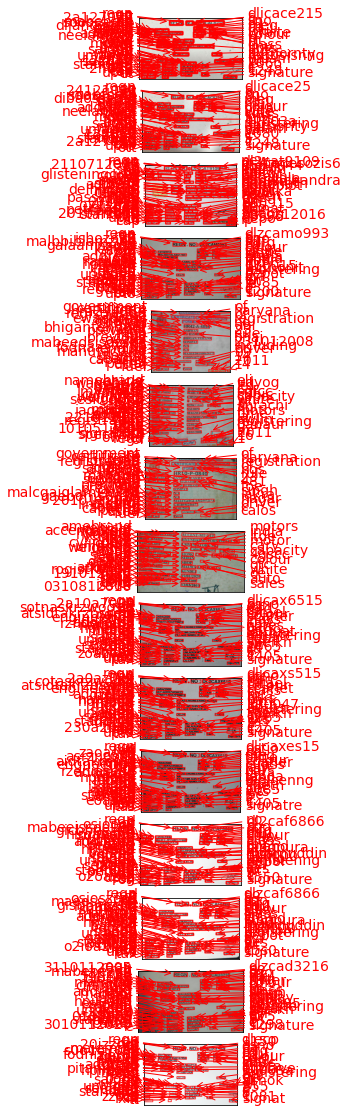

In [11]:
import matplotlib.pyplot as plt

import keras_ocr

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

#Get a set of images


images = [
    keras_ocr.tools.read(url) for url in a
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.

prediction_groups = pipeline.recognize(images)
arr=[]

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
    print('Predicted:', [text for text, box in predictions])
    arr.append([text for text, box in predictions])





In [12]:
arr

[['regn',
  'dlicace215',
  'no',
  's',
  'o',
  'sno',
  'o1',
  'reg',
  'dt',
  '2a127012',
  'meg',
  'cd',
  'mul',
  'ch',
  'no',
  'mabehebi',
  'soossasso',
  'wraite',
  'colour',
  'p',
  'm',
  'a',
  'e',
  'no',
  'dijancesasi',
  'class',
  'lmv',
  'name',
  'nayar',
  'srishn',
  'swid',
  'of',
  'sanjiv',
  'nayar',
  'adoress',
  'block',
  'neelamber',
  'apts',
  '80',
  'c',
  'bagh',
  'rand',
  'new',
  'delh',
  'looss',
  'model',
  'swift',
  'vdi',
  'bss',
  'm',
  'autnornty',
  'regusisnng',
  'body',
  'saloon',
  'no',
  'of',
  'cyl',
  'palam',
  'base',
  'wheel',
  'o',
  'unladen',
  'wt',
  '106o',
  'mfg',
  'dt',
  '12z012',
  'seating',
  'c',
  'fuel',
  'diesel',
  'standing',
  'c',
  'reg',
  'upto',
  'zan',
  '2no27',
  'cu',
  'cap',
  '1248',
  'tax',
  'upto',
  'signature',
  'ot'],
 ['regn',
  'no',
  'dlicace25',
  's',
  'o',
  'sno',
  '01',
  'reg',
  'dt',
  '24121012',
  'meg',
  'cd',
  'mul',
  'ch',
  'no',
  'mabfhebi',
 

In [13]:
import pandas as pd
x=pd.Series(arr)
x

0     [regn, dlicace215, no, s, o, sno, o1, reg, dt,...
1     [regn, no, dlicace25, s, o, sno, 01, reg, dt, ...
2     [new, regn, no, dl2cat9109, s, regn, dts, 2110...
3     [regn, no, dlzcamo993, s, o, sno, o1, reg, dt,...
4     [government, of, haryana, certificate, of, reg...
5     [namebrand, vehicle, of, wagnorlet, eli, maker...
6     [government, of, haryana, ire, certificate, re...
7     [amebrand, of, vehicle, accentmtgle, makers, n...
8     [regn, no, dlicax6515, s, d, osno, 01, reg, dt...
9     [regn, noe, dlicaxs515, d, osno, ot, reg, dt, ...
10    [regn, nor, dlicaxes15, d, ostio, on, reg, dt,...
11    [regn, no, dl2caf6866, , d, o, sno, o2, reg, d...
12    [regn, no, dlzcaf6866, s, d, o, sno, o2, reg, ...
13    [regn, no, dlzcad3216, s, o, sno, 01, 31101120...
14    [regn, no, dlecp, 1150, s, d, osno, da, reg, d...
dtype: object

In [14]:
dfObj = pd.DataFrame(arr) 
dfObj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,regn,dlicace215,no,s,o,sno,o1,reg,dt,2a127012,meg,cd,mul,ch,no,mabehebi,soossasso,wraite,colour,p,m,a,e,no,dijancesasi,class,lmv,name,nayar,srishn,swid,of,sanjiv,nayar,adoress,block,neelamber,apts,80,c,...,no,of,cyl,palam,base,wheel,o,unladen,wt,106o,mfg,dt,12z012,seating,c,fuel,diesel,standing,c,reg,upto,zan,2no27,cu,cap,1248,tax,upto,signature,ot,None,None,None,None,None,None,None,None,None,None
1,regn,no,dlicace25,s,o,sno,01,reg,dt,24121012,meg,cd,mul,ch,no,mabfhebi,soossssso,colour,pma,wite,e,no,dibaosseast,class,lmv,name,srishti,nayar,swid,of,sanjiy,nayar,addresst,80,c,block,neelamber,apts,rani,bagh,...,cyl,palam,wheel,base,o,unladen,wt,1080,meg,dt,122012,seating,c,5,fuel,diesel,standing,c,reg,upto,2a127027,cu,cap,1248,tax,upto,ott,signature,None,None,None,None,None,None,None,None,None,None,None,None
2,new,regn,no,dl2cat9109,s,regn,dts,2110712015,ch,no,mabedesozis6,o,sno,01,e,no,1567044,colour,glisteninggrey,mfr,suzuki,maruti,india,ltd,vec,cl,motor,car,name,anoop,suresh,dhawale,swid,of,harishchandra,suresh,dhawale,address,72,shri,...,vxi,body,rigid,passenger,carj,wheel,base,002425,no,of,cyl,03,mfg,dt,0712015,unladen,wt,000915,fuel,petrolicing,seating,c,005,signat,regd,upto,20107iz010,standing,c,00,ogaog,28f1212016,tax,upto,00s96,or,cu,cap,depo,ip
3,regn,no,dlzcamo993,s,o,sno,o1,reg,dt,ishozo10,mifg,cd,hyu,ch,no,malbbiblamzies,colour,cr,white,e,no,galaamssoss,class,lmv,name,mr,kamal,bhola,swid,of,sfo,sh,jc,bhola,address,ssb,block,ind,ab,floor,...,of,cyl,no,4,saloon,body,wt,1085,unladen,base,wheel,o,le,5,seating,c,oszo10,mfgdt,standing,c,petrol,fuel,1200,cucap,ozoz5,regupto,121,signature,ott,tax,upto,None,None,None,None,None,None,None,None,None
4,government,of,haryana,certificate,of,registration,form,no,23,rule,abl,registration,hra244854,no,name,ewaddress,ashwan,ofregds,owner,slo,ram,bhaj,bhigantehgner,sonipat,previous,regn,no,nia,previous,owner,nia,mabeedsisozsits,chasis,no,fodnaas7156,engine,no,231012008,manufacture,of,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,namebrand,vehicle,of,wagnorlet,eli,makers,name,marute,udyog,ltd,vehicle,class,lmvmotor,car,noof,cylinders,ogicc,cubic,4,capacity,unladen,weightkgl,seskcolour,s,white,type,of,body,saloon,hpal,lease,agg,magma,shrachi,fin,jagmohan,motors,dealers,name,sonipat,...,issuc,date,ewlin,registering,signature,specimen,ganaur,3l4,v,m,owner,regd,of,2011,16,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,government,of,haryana,ire,certificate,registration,of,oe,form,nos,rule,23,481,hrioposa0,registration,no,name,c,address,sandeep,lakra,toe,regds,of,owner,slo,mahabir,singh,lakra,63812d,subhash,nagar,sonipat,previous,regn,no,nia,previous,owner,nia,...,c,calos,petrol,used,fuel,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,amebrand,of,vehicle,accentmtgle,makers,name,hyundai,motors,india,ltde,vehicle,class,ce,lmy,motor,cary,noof,cylinders,cubic,4,capacity,4gscc,unladen,weightkg,1039k,colour,gtc,type,white,s,of,body,sedan,hpal,lease,oe,agg,sbop,dealer,name,...,one,time,date,of,issue,0310812010,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,regn,no,dlicax6515,s,d,osno,01,reg,dt,2a10a7009,mfd,cd,tatael,ch,no,sotnaskrzwoostz,colour,scarler,e,no,atsidtakrzbssets,class,lmy,,name,vikas,engineering,nores,swid,of,na,addresss,rzfitisisshv,park,viliage,nanglon,jat,delhi,9100at,h

In [0]:
dfObj.to_excel(r'/content/drive/My Drive/Dataset/output.xlsx', index = False)